In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np
import seaborn as sns
sns.set()


In [2]:
#Leitura de dados:
masc16 = pd.read_csv('data/players_16.csv')
masc17 = pd.read_csv('data/players_17.csv')
masc18 = pd.read_csv('data/players_18.csv')
masc19 = pd.read_csv('data/players_19.csv')
masc20 = pd.read_csv('data/players_20.csv')
masc21 = pd.read_csv('data/players_21.csv')
masc22 = pd.read_csv('data/players_22.csv')

C:\Users\vdfrf\AppData\Local\Temp\ipykernel_14608\3446605684.py:2: DtypeWarning: Columns (104) have mixed types. Specify dtype option on import or set low_memory=False.
  masc16 = pd.read_csv('data/players_16.csv')
C:\Users\vdfrf\AppData\Local\Temp\ipykernel_14608\3446605684.py:4: DtypeWarning: Columns (81,82,83,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  masc18 = pd.read_csv('data/players_18.csv')
C:\Users\vdfrf\AppData\Local\Temp\ipykernel_14608\3446605684.py:8: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  masc22 = pd.read_csv('data/players_22.csv')


In [5]:
#Agrupamento:
#Objetivo: Ver quais são os 10 clubes que mais gastam dinheiro com o salário dos jogadores e comparar suas médias salarias

clubs16 = masc16.groupby(['club_name']).aggregate({'wage_eur': lambda x: sum(x)/1e+6}).sort_values('wage_eur', ascending=False)
clubs16['wage_mean'] = masc16.groupby(['club_name']).aggregate({'wage_eur':lambda x: np.mean(x)/1e+6})
clubs16.head(10)

,wage_eur,wage_mean
club_name,,
FC Barcelona,3.666,0.122200
FC Bayern München,3.460,0.119310
Real Madrid CF,3.284,0.105935
Chelsea,2.847,0.101679
Manchester City,2.817,0.097138
Paris Saint-Germain,2.734,0.097643
Arsenal,2.640,0.082500
Juventus,2.625,0.100962
Borussia Dortmund,2.381,0.082103


In [6]:
clubs17 = masc17.groupby(['club_name']).aggregate({'wage_eur':lambda x: sum(x)/1e+6}).sort_values('wage_eur', ascending=False)
clubs17['wage_mean'] = masc17.groupby(['club_name']).aggregate({'wage_eur':lambda x: np.mean(x)/1e+6})
clubs17.head(10)

,wage_eur,wage_mean
club_name,,
Real Madrid CF,5.245,0.158939
FC Barcelona,5.220,0.158182
Manchester City,3.442,0.104303
Manchester United,3.412,0.106625
Chelsea,3.379,0.102394
Juventus,3.155,0.116852
Arsenal,3.146,0.095333
FC Bayern München,3.032,0.112296
Liverpool,2.514,0.076182


In [7]:
clubs18 = masc18.groupby(['club_name']).aggregate({'wage_eur':lambda x: sum(x)/1e+6}).sort_values('wage_eur', ascending=False)
clubs18['wage_mean'] = masc18.groupby(['club_name']).aggregate({'wage_eur':lambda x: np.mean(x)/1e+6})

clubs19 = masc19.groupby(['club_name']).aggregate({'wage_eur':lambda x: sum(x)/1e+6}).sort_values('wage_eur', ascending=False)
clubs19['wage_mean'] = masc19.groupby(['club_name']).aggregate({'wage_eur':lambda x: np.mean(x)/1e+6})

clubs20 = masc20.groupby(['club_name']).aggregate({'wage_eur':lambda x: sum(x)/1e+6}).sort_values('wage_eur', ascending=False)
clubs20['wage_mean'] = masc20.groupby(['club_name']).aggregate({'wage_eur':lambda x: np.mean(x)/1e+6})

clubs21 = masc21.groupby(['club_name']).aggregate({'wage_eur':lambda x: sum(x)/1e+6}).sort_values('wage_eur', ascending=False)
clubs21['wage_mean'] = masc21.groupby(['club_name']).aggregate({'wage_eur':lambda x: np.mean(x)/1e+6})

clubs22 = masc22.groupby(['club_name']).aggregate({'wage_eur':lambda x: sum(x)/1e+6}).sort_values('wage_eur', ascending=False)
clubs22['wage_mean'] = masc22.groupby(['club_name']).aggregate({'wage_eur':lambda x: np.mean(x)/1e+6})


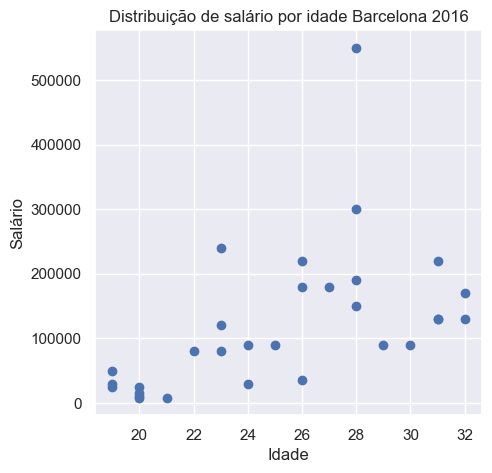

In [12]:
#Filtragem: Selecionando o clube que possui a folha salarial mais alta de 2016
barcelona = masc16.query("club_name == 'FC Barcelona'")

#Gráfico 1: Idade x Salário -> Barcelona 2016
fig, ax = plt.subplots(figsize=(5,5))
ax.set_title('Distribuição de salário por idade Barcelona 2016')
ax.set_xlabel('Idade')
ax.set_ylabel('Salário')
ax.scatter(barcelona['age'], barcelona['wage_eur'])


In [13]:
#Gráfico 2: 10 folhas salariais mais altas de 2016
#Segundo o agrupamento feito anteriormente, obtem-se as 10 folhas salariais mais altas do ano em questão:
clubs16.head(10)

#Gráfico 3: Média salarial dos 10 clubes que mais gastaram em salários em 2016

,wage_eur,wage_mean
club_name,,
FC Barcelona,3.666,0.122200
FC Bayern München,3.460,0.119310
Real Madrid CF,3.284,0.105935
Chelsea,2.847,0.101679
Manchester City,2.817,0.097138
Paris Saint-Germain,2.734,0.097643
Arsenal,2.640,0.082500
Juventus,2.625,0.100962
Borussia Dortmund,2.381,0.082103


Text(0, 0.5, 'Média salarial(em milhões)')

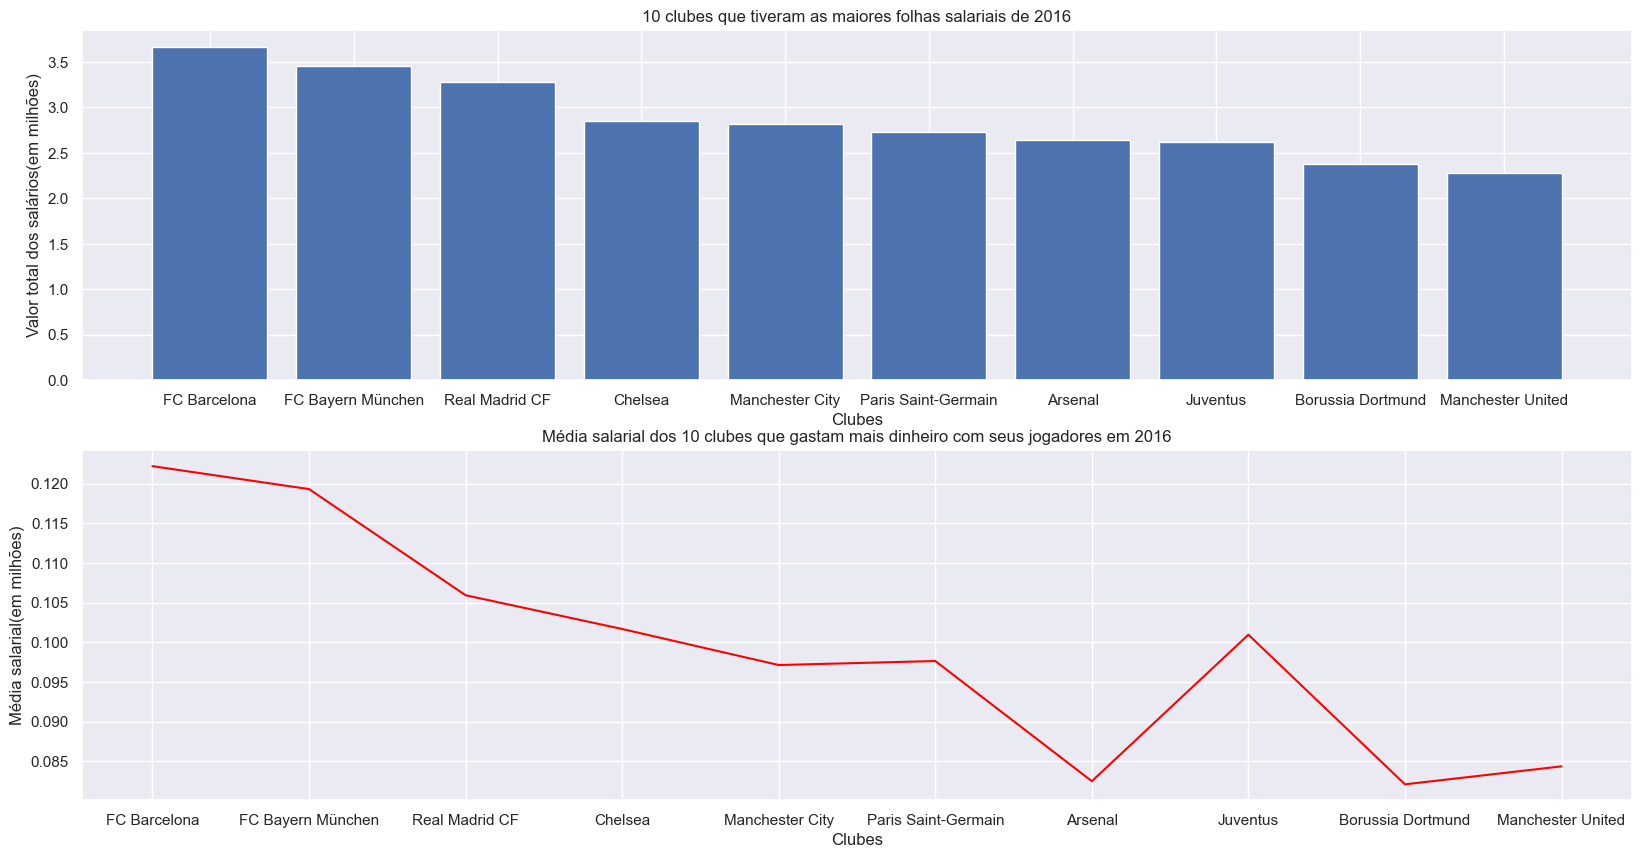

In [17]:
fig, axes = plt.subplots(2, 1, figsize=(20,10))
axes[0].bar(clubs16.head(10).index, clubs16.head(10)['wage_eur'])
axes[0].set_title('10 clubes que tiveram as maiores folhas salariais de 2016')
axes[0].set_xlabel('Clubes')
axes[0].set_ylabel('Valor total dos salários(em milhões)')
axes[1].plot(clubs16.head(10).index,clubs16.head(10)['wage_mean'], color='red')
axes[1].set_title('Média salarial dos 10 clubes que gastam mais dinheiro com seus jogadores em 2016')
axes[1].set_xlabel('Clubes')
axes[1].set_ylabel('Média salarial(em milhões)')

In [18]:
#Pivoteamento: Média salarial por idade x clube de 2016
#Filtrando apenas os clubes que fazem parte dos 10 que possuem a maior folha salarial
club_filter = masc16.query("club_name == ['FC Barcelona' , 'FC Bayern München', 'Real Madrid FC', 'Chelsea', 'Manchester City', 'Paris Saint-Germain', 'Arsenal', 'Juventus', 'Borussia Dortmund', 'Manchester United']")

wage_per_age_club = club_filter.pivot_table(values='wage_eur' , index='age', columns='club_name', aggfunc=lambda x: np.mean(x)/1e+6)
wage_per_age_club

club_name,Arsenal,Borussia Dortmund,Chelsea,FC Barcelona,FC Bayern München,Juventus,Manchester City,Manchester United,Paris Saint-Germain
age,,,,,,,,,
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0020
17,0.003333,NaN,NaN,NaN,NaN,0.005000,0.004000,NaN,0.0020
18,0.002000,0.002000,0.003667,NaN,0.006000,0.005000,0.005750,NaN,0.0065
19,0.002000,0.007250,0.021750,0.035000,0.015000,NaN,NaN,0.028667,0.0030
20,0.024000,0.027500,0.041667,0.014500,0.012333,0.060000,0.057500,0.005000,0.0375
21,0.090000,0.028333,0.004000,0.008000,0.006000,0.060000,NaN,0.057500,0.0900
22,NaN,0.060000,NaN,0.080000,0.090000,0.116667,0.050000,0.009000,0.1100
23,0.095000,0.080000,0.175000,0.146667,0.165000,NaN,NaN,0.090000,0.0040
24,0.097500,0.110000,0.240000,0.060000,0.092500,0.103333,0.140000,0.180000,0.1000


<AxesSubplot:title={'center':'Mapa de calor da média salarial por idade e clube'}, xlabel='club_name', ylabel='age'>

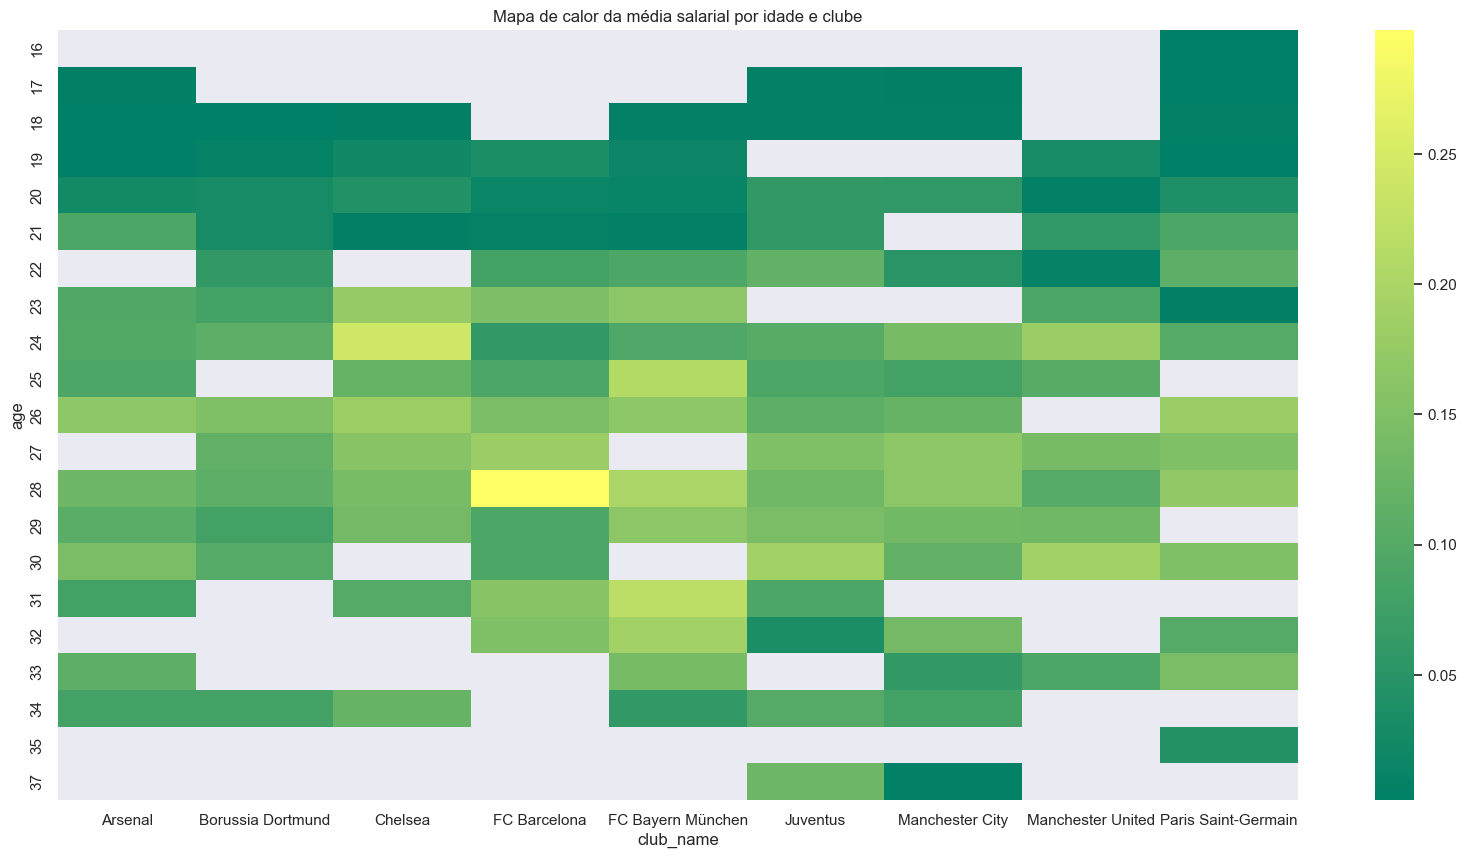

In [19]:
#Gráfico 4: Mapa de calor do pivoteamento acima

fig, ax = plt.subplots(figsize=(20,10))
ax.set_title('Mapa de calor da média salarial por idade e clube')
sns.heatmap(wage_per_age_club, cmap='summer')

In [20]:
#Concatenação: juntando os anos e comparando as médias salariais ao longo dos anos
#Escolhi um clube por liga dos 10 que possuiam a folha mais alta em 2016(Barcelona, Bayern, Chelsea, PSG, Junventus)

#Adicionando uma coluna de ano para auxiliar na comparação
clubs16['year'] = 2016
clubs17['year'] = 2017
clubs18['year'] = 2018
clubs19['year'] = 2019
clubs20['year'] = 2020
clubs21['year'] = 2021
clubs22['year'] = 2022

#Concatenando:
df = pd.concat([clubs16, clubs17, clubs18, clubs19, clubs20, clubs21, clubs22])

barcelona = df.query("club_name == 'FC Barcelona'") #Seleciona o clube Barcelona de todos os anos
bayern = df.query("club_name == 'FC Bayern München'") #Seleciona o clube Bayern de todos os anos
chelsea = df.query("club_name == 'Chelsea'") #Seleciona o clube Chelsea de todos os anos
psg = df.query("club_name == 'Paris Saint-Germain'") #Seleciona o clube Paris Saint-Germain de todos os anos
juventus = df.query("club_name == 'Juventus'") #Seleciona o clube Juventus de todos os anos



In [21]:
barcelona

,wage_eur,wage_mean,year
club_name,,,
FC Barcelona,3.666,0.122200,2016
FC Barcelona,5.220,0.158182,2017
FC Barcelona,4.715,0.188600,2018
FC Barcelona,4.839,0.161300,2019
FC Barcelona,4.906,0.148667,2020
FC Barcelona,4.738,0.143576,2021
FC Barcelona,3.230,0.097879,2022


In [22]:
bayern

,wage_eur,wage_mean,year
club_name,,,
FC Bayern München,3.460,0.119310,2016
FC Bayern München,3.032,0.112296,2017
FC Bayern München,3.201,0.123115,2018
FC Bayern München,2.410,0.077742,2019
FC Bayern München,2.527,0.109870,2020
FC Bayern München,1.808,0.082182,2021
FC Bayern München,2.036,0.072714,2022


In [23]:
chelsea

,wage_eur,wage_mean,year
club_name,,,
Chelsea,2.847,0.101679,2016
Chelsea,3.379,0.102394,2017
Chelsea,3.508,0.106303,2018
Chelsea,3.367,0.102030,2019
Chelsea,2.768,0.083879,2020
Chelsea,2.699,0.081788,2021
Chelsea,2.978,0.090242,2022


In [24]:
psg

,wage_eur,wage_mean,year
club_name,,,
Paris Saint-Germain,2.73400,0.097643,2016
Paris Saint-Germain,2.09500,0.069833,2017
Paris Saint-Germain,2.20300,0.078679,2018
Paris Saint-Germain,2.27100,0.068818,2019
Paris Saint-Germain,2.38450,0.072258,2020
Paris Saint-Germain,2.13155,0.073502,2021
Paris Saint-Germain,3.00000,0.090909,2022


In [25]:
juventus

,wage_eur,wage_mean,year
club_name,,,
Juventus,2.625,0.100962,2016
Juventus,3.155,0.116852,2017
Juventus,3.190,0.122692,2018
Juventus,3.247,0.124885,2019
Juventus,3.703,0.112212,2020
Juventus,2.169,0.069968,2021
Juventus,1.936,0.074462,2022


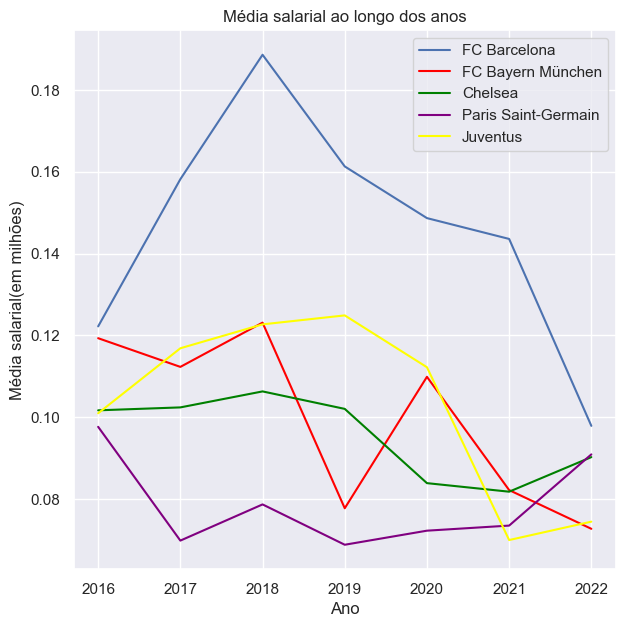

In [46]:
#Gráfico 5: Média salarial desses 4 clubes ao longo dos anos

fig, ax = plt.subplots(figsize=(7,7))
ax.set_title('Média salarial ao longo dos anos')
ax.set_xlabel('Ano')
ax.set_ylabel('Média salarial(em milhões)')
ax.plot(barcelona['year'], barcelona['wage_mean'], label='FC Barcelona')
ax.plot(bayern['year'], bayern['wage_mean'], color='red', label='FC Bayern München')
ax.plot(chelsea['year'], chelsea['wage_mean'], color='green', label='Chelsea')
ax.plot(psg['year'], psg['wage_mean'], color='purple', label='Paris Saint-Germain')
ax.plot(juventus['year'], juventus['wage_mean'],color='yellow', label='Juventus')
ax.legend()

In [53]:
#Join:
#clubs16 = clubs16.head(10).drop(labels='year', axis=1) 
#clubs17 = clubs17.drop(labels='year', axis=1)
#clubs18 = clubs18.drop(labels='year', axis=1)
#clubs19 = clubs19.drop(labels='year', axis=1)
#clubs20 = clubs20.drop(labels='year', axis=1)
#clubs21 = clubs21.drop(labels='year', axis=1)
#clubs22 = clubs22.drop(labels='year', axis=1)

j = clubs16.join(clubs17, how='left', rsuffix='_2017').join(clubs18, how='left', rsuffix='_2018').join(clubs19, how='left', rsuffix='_2019').join(clubs20, how='left', rsuffix='_2020').join(clubs21, how='left', rsuffix='_2021').join(clubs22, how='left', rsuffix='_2022')

j


,wage_eur,wage_mean,wage_eur_2017,wage_mean_2017,wage_eur_2018,wage_mean_2018,wage_eur_2019,wage_mean_2019,wage_eur_2020,wage_mean_2020,wage_eur_2021,wage_mean_2021,wage_eur_2022,wage_mean_2022
club_name,,,,,,,,,,,,,,
FC Barcelona,3.666,0.122200,5.220,0.158182,4.715,0.188600,4.839,0.161300,4.9060,0.148667,4.73800,0.143576,3.2300,0.097879
FC Bayern München,3.460,0.119310,3.032,0.112296,3.201,0.123115,2.410,0.077742,2.5270,0.109870,1.80800,0.082182,2.0360,0.072714
Real Madrid CF,3.284,0.105935,5.245,0.158939,4.690,0.180385,5.085,0.154091,5.2920,0.160364,4.82100,0.150656,4.3940,0.133152
Chelsea,2.847,0.101679,3.379,0.102394,3.508,0.106303,3.367,0.102030,2.7680,0.083879,2.69900,0.081788,2.9780,0.090242
Manchester City,2.817,0.097138,3.442,0.104303,3.141,0.095182,3.776,0.114424,3.9155,0.118652,3.73700,0.113242,3.6104,0.112825
Paris Saint-Germain,2.734,0.097643,2.095,0.069833,2.203,0.078679,2.271,0.068818,2.3845,0.072258,2.13155,0.073502,3.0000,0.090909
Arsenal,2.640,0.082500,3.146,0.095333,2.961,0.089727,2.484,0.075273,2.0630,0.062515,2.10200,0.063697,1.7195,0.052106
Juventus,2.625,0.100962,3.155,0.116852,3.190,0.122692,3.247,0.124885,3.7030,0.112212,2.16900,0.069968,1.9360,0.074462
Borussia Dortmund,2.381,0.082103,1.550,0.046970,1.674,0.050727,1.158,0.036187,1.8168,0.058606,1.34000,0.043226,1.3640,0.044000


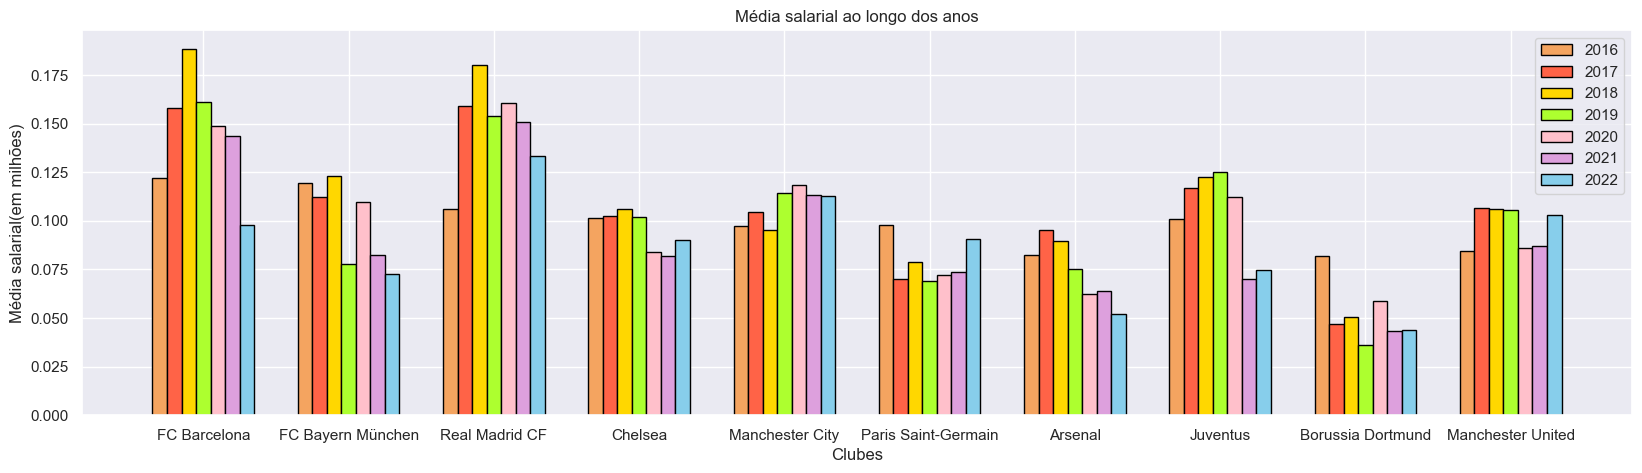

In [50]:
#Gráfico 6: Análise dos salários médios ao longo dos anos de 10 clubes

wd = 0.1
x = np.arange(len(j.index))
fig, ax = plt.subplots(figsize=(20,5))
ax.set_title('Média salarial ao longo dos anos')
ax.set_xlabel('Clubes')
ax.set_ylabel('Média salarial(em milhões)')
ax.bar(x - wd*3, j['wage_mean'], wd, edgecolor='black', label='2016', color='sandybrown')
ax.bar(x - wd*2, j['wage_mean_2017'], wd, edgecolor='black', label='2017', color='tomato')
ax.bar(x - wd, j['wage_mean_2018'], wd, edgecolor='black', label='2018', color='gold')
ax.bar(x, j['wage_mean_2019'], wd, edgecolor='black', label='2019', color='greenyellow')
ax.bar(x + wd, j['wage_mean_2020'], wd, edgecolor='black', label='2020', color='pink')
ax.bar(x + wd*2, j['wage_mean_2021'], wd, edgecolor='black', label='2021', color='plum')
ax.bar(x + wd*3, j['wage_mean_2022'], wd, edgecolor='black', label='2022', color='skyblue')

plt.xticks(x, j.index)
ax.legend()